# **Projet 2 :** Analysez des données de systèmes éducatifs

## Import des dépendences et configuration

In [213]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

In [115]:
# configurations
pd.set_option('display.max_rows', 242)
pd.set_option('display.max_columns', 242)

## Chargement des données

In [3]:
# Charger EdStatsData.csv pour les data
df_data = pd.read_csv("./data/EdStatsData.csv", header=0)
# Supprimer la dernière colonne
df_data=df_data.iloc[:, :-1]

In [13]:
# Charger EdStatsSeries.csv pour le detail des indicator
df_series = pd.read_csv("./data/EdStatsSeries.csv", header=0)
# Supprimer la dernière colonne
df_series=df_series.iloc[:, :-1]

In [5]:
# Charger EdStatsCountry.csv pour le detail des pays
df_country = pd.read_csv("./data/EdStatsCountry.csv", header=0)
# Supprimer la dernière colonne
df_country=df_country.iloc[:, :-1]

## Format des données

In [4]:
# Regarder les infos
df_data.info()
# Chargement des données OK

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 69 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [5]:
# Regarder les infos
df_series.info()
# Chargement des données OK

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

In [81]:
# Regarder les infos
df_country.info()
# Chargement des données OK

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 31 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [91]:
# Liste des régions et nombre de pays par régions
df_country['Region'].value_counts()

Europe & Central Asia         57
Sub-Saharan Africa            48
Latin America & Caribbean     41
East Asia & Pacific           36
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: Region, dtype: int64

In [6]:
df_series['Topic'].value_counts()
# liste des topics avec leur nombre d'occurence

Learning Outcomes                                                                               1046
Attainment                                                                                       733
Education Equality                                                                               426
Secondary                                                                                        256
Primary                                                                                          248
Population                                                                                       213
Tertiary                                                                                         158
Teachers                                                                                         137
Expenditures                                                                                      93
Engaging the Private Sector (SABER)                                                        

In [7]:
print(f"Nombre de pays: {df_data['Country Name'].unique().size}")
df_data['Indicator Name'].value_counts()
# 1 indicateur par pays
# pas de data dupliqué

Nombre de pays: 242


Adjusted net enrolment rate, lower secondary, both sexes (%)                                       242
Population, ages 10-18, female                                                                     242
Population, ages 10-18, total                                                                      242
Population, ages 11-15, female                                                                     242
Population, ages 11-15, male                                                                       242
                                                                                                  ... 
Expenditure on education not allocated by level as % of government expenditure on education (%)    242
Expenditure on lower secondary as % of government expenditure on education (%)                     242
Expenditure on lower secondary as % of total government expenditure (%)                            242
Expenditure on post-secondary non-tertiary as % of government expenditure

## Forme du fichier `DATA`

In [206]:
# Est ce que nous avons des données pour toutes les année / pays
_df1 = df_data.iloc[:,4:].notna().groupby(df_data["Country Code"]).sum()
_df2 = df_data.iloc[:,4:52].notna().sum(axis=1).groupby(df_data["Country Code"]).sum()
_df3 = pd.concat([df_data[["Country Code", "Country Name"]].groupby("Country Code").first(), _df1, _df2], axis=1).sort_values(by=0, ascending=False)
_df3.style.background_gradient(cmap='Blues')

# export sous forme d'image
# import dataframe_image as dfi
#_df_styled = _df3.style.background_gradient(cmap='Blues')
# dfi.export(_df_styled, 'df_data.png', max_rows=-1, max_cols=-1)

## Nettoyer les données

In [28]:
df_series['Series Code'] = df_series['Series Code'].apply(lambda x: x.strip())
df_data['Indicator Code'] = df_data['Indicator Code'].apply(lambda x: x.strip().upper())

## Agregation des dataframes

In [207]:
df = df_data
df = pd.merge(left=df, right=df_series[["Series Code", "Topic"]], left_on='Indicator Code', right_on='Series Code')
df = pd.merge(left=df, right=df_country[["Country Code", "Region"]], left_on='Country Code', right_on='Country Code', how='left')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886930 entries, 0 to 886929
Data columns (total 72 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

## Choix des indicateurs

In [117]:
year_list = ["2010", "2011", "2012", "2013", "2014", "2015", "2016"]

In [208]:
# Est ce que nous avons des données pour toutes les année / indicator
# Cela nous permet de prendre un indicateur pour lequel on a le plus de pays
_df = df[['Indicator Code', 'Indicator Name', 'Topic']].groupby('Indicator Code').first()
_df['ID_YEAR_SUM'] = df[year_list].notna().groupby(df["Indicator Code"]).sum().sum(axis=1)
_df.sort_values('ID_YEAR_SUM', ascending=False).iloc[0:100,:]  # .to_excel("most_country_by_indicator.xlsx")

Indicator Name  \
Indicator Code                                                           
SP.POP.TOTL                                          Population, total   
SP.POP.GROW                               Population growth (annual %)   
IT.NET.USER.P2                         Internet users (per 100 people)   
NY.GDP.MKTP.CD                      GDP at market prices (current US$)   
NY.GDP.PCAP.CD                            GDP per capita (current US$)   
NY.GDP.MKTP.KD                GDP at market prices (constant 2005 US$)   
NY.GDP.PCAP.KD                      GDP per capita (constant 2005 US$)   
SP.POP.1564.TO.ZS                  Population, ages 15-64 (% of total)   
SP.POP.TOTL.FE.IN                                   Population, female   
SP.POP.TOTL.FE.ZS                      Population, female (% of total)   
SP.POP.0014.TO                            Population, ages 0-14, total   
SP.POP.0014.TO.ZS                   Population, ages 0-14 (% of total)   
SP.POP.TOTL.MA.ZS                        Population, male (% of total)   
SP.POP.TOTL.MA.IN                                     Population, male   
SP.POP.0014.FE.IN                        Population, ages 0-14, female   
SP.POP.0014.MA.IN                          Population, ages 0-14, male   
SP.POP.1564.TO                           Population, ages 15-64, total   
SP.POP.1564.MA.IN                         Population, ages 15-64, male   
SP.POP.1564.FE.IN                       Population, ages 15-64, female   
SH.DYN.MORT                        Mortality rate, under-5 (per 1,000)   
NY.GNP.MKTP.CD                                       GNI (current US$)   
NY.GDP.PCAP.PP.CD        GDP per capita, PPP (current international $)   
NY.GDP.MKTP.PP.KD             GDP, PPP (constant 2011 international $)   
NY.GDP.MKTP.PP.CD                   GDP, PPP (current international $)   
NY.GDP.PCAP.PP.KD    GDP per capita, PPP (constant 2011 internation...   
NY.GNP.PCAP.CD              GNI per capita, Atlas method (current US$)   
SL.UEM.TOTL.FE.ZS       Unemployment, female (% of female labor force)   
SL.UEM.TOTL.MA.ZS           Unemployment, male (% of male labor force)   
SL.UEM.TOTL.ZS            Unemployment, total (% of total labor force)   
SP.SEC.UTOT.IN       Population of the official age for upper secon...   
SL.TLF.TOTL.IN                                      Labor force, total   
SL.TLF.TOTL.FE.ZS         Labor force, female (% of total labor force)   
SP.SEC.LTOT.IN       Population of the official age for lower secon...   
SP.SEC.TOTL.IN       Population of the official age for secondary e...   
SP.SEC.UTOT.MA.IN    Population of the official age for upper secon...   
SP.SEC.UTOT.FE.IN    Population of the official age for upper secon...   
SP.SEC.LTOT.FE.IN    Population of the official age for lower secon...   
NY.GNP.MKTP.PP.CD                   GNI, PPP (current international $)   
NY.GNP.PCAP.PP.CD        GNI per capita, PPP (current international $)   
SP.SEC.LTOT.MA.IN    Population of the official age for lower secon...   
SP.SEC.TOTL.FE.IN    Population of the official age for secondary e...   
SP.SEC.TOTL.MA.IN    Population of the official age for secondary e...   
SP.PRE.TOTL.IN       Population of the official age for pre-primary...   
SP.PRE.TOTL.FE.IN    Population of the official age for pre-primary...   
SP.PRE.TOTL.MA.IN    Population of the official age for pre-primary...   
UIS.SAP.23.GPV.G1    Population of the official entrance age to sec...   
SP.PRM.TOTL.IN       Population of the official age for primary edu...   
UIS.SAP.1.G1         Population of the official entrance age to pri...   
UIS.SAP.23.GPV.G1.F  Population of the official entrance age to sec...   
UIS.SAP.23.GPV.G1.M  Population of the official entrance age to sec...   
SP.PRM.TOTL.MA.IN    Population of the official age for primary edu...   
SP.PRM.TOTL.FE.IN    Population of the official age for primary edu...   
UIS.SAP.1.G1.F       Population of the official entrance age

### Indicateurs choisi :
* Population du pays ayant acces à internet (%)
* Population du pays ayant un ordinateur personel (%)
* Population total
* Population 15-24ans
* GNI (PIB) ($)
* Nombre d'étudiant en cycle secondaire
* Nombre d'étudiant en cycle tertiaire

In [266]:
# indicator_list = ['SP.POP.TOTL', 'IT.NET.USER.P2', 'IT.CMP.PCMP.P2', 'NY.GNP.MKTP.CD', 'SP.SEC.TOTL.IN', 'SP.TER.TOTL.IN', 'SP.POP.1524.TO.UN']
indicator_list = ['SP.POP.TOTL', 'IT.NET.USER.P2', 'NY.GNP.MKTP.CD', 'SP.SEC.TOTL.IN', 'SP.TER.TOTL.IN', 'SP.POP.1524.TO.UN']

In [411]:
# construction d'une dataframe par pays
df_final = df.loc[df['Indicator Code'].isin(indicator_list), ['Country Code', 'Region', 'Indicator Code', *year_list]].set_index(['Indicator Code', 'Region', 'Country Code']).ffill(axis=1).bfill(axis=1).mean(axis=1).unstack(level=0)
df_final['STUD.SEC.RATE'] = df_final['SP.SEC.TOTL.IN'] / df_final['SP.POP.TOTL']
df_final['STUD.TER.RATE'] = df_final['SP.TER.TOTL.IN'] / df_final['SP.POP.TOTL']
df_final['STUD.TOTL'] = df_final['SP.SEC.TOTL.IN'] + df_final['SP.TER.TOTL.IN']
df_final['STUD.TOTL.RATE'] = df_final['STUD.TOTL'] / df_final['SP.POP.TOTL']
df_final['POP.1524.RATE'] = df_final['SP.POP.1524.TO.UN'] / df_final['SP.POP.TOTL']
df_final['LOG.POP.1524'] = df_final['SP.POP.1524.TO.UN']
df_final['LOG.GNI'] = np.log2(df_final['NY.GNP.MKTP.CD'])
df_final['LOG.STUD.TOTL'] = np.log2(df_final['STUD.TOTL'])
df_final['LOG.STUD.TER'] = np.log2(df_final['SP.TER.TOTL.IN'])
df_final['LOG.STUD.SEC'] = np.log2(df_final['SP.SEC.TOTL.IN'])
df_final

Indicator Code                           IT.NET.USER.P2  NY.GNP.MKTP.CD  \
Region                     Country Code                                   
NaN                        ARB                33.991949    2.675688e+12   
                           EAP                38.968510    1.132984e+13   
                           EAS                43.754148    2.079907e+13   
                           ECA                51.297737    3.576095e+12   
                           ECS                65.538253    2.192971e+13   
                           EMU                75.580997    1.278169e+13   
                           EUU                73.982689    1.779720e+13   
                           GIB                69.216067             NaN   
                           HIC                76.846043    4.882478e+13   
                           HPC                 9.205370    5.606176e+11   
                           LAC                45.523578    5.269522e+12   
                           LCN                46.132005    5.685535e+12   
                           LDC                 8.825161    8.223801e+11   
                           LIC                 6.886568    3.567753e+11   
                           LMC                19.641847    5.620665e+12   
                           LMY                29.415613    2.568360e+13   
                           MEA                35.920253    3.273358e+12   
                           MIC                31.835575    2.532614e+13   
                           MNA                30.777839    1.515956e+12   
                           NAC                74.260452    1.883288e+13   
                           NRU                      NaN             NaN   
                           OED                72.944367    4.765818e+13   
                           SAS                15.797747    2.446694e+12   
                           SSA                12.989567    1.515090e+12   
                           SSF                12.993164    1.516296e+12   
                           UMC                45.464573    1.970108e+13   
                           VGB                      NaN             NaN   
                           WLD                37.200467    7.449731e+13   
East Asia & Pacific        ASM                      NaN             NaN   
                           AUS                82.105767    1.339288e+12   
                           BRN                64.106152    1.585787e+10   
                           CHN                44.585731    9.188513e+12   
                           FJI                34.764191    3.937422e+09   
                           FSM                27.296810    3.446178e+08   
                           GUM                65.442023             NaN   
                           HKG                77.630710    2.829249e+11   
                           IDN                16.734624    8.535828e+11   
                           JPN                85.306401    5.506690e+12   
                           KHM                10.667241    1.463084e+10   
                           KIR                11.466326    2.827187e+08   
                           KOR                86.603018    1.295771e+12   
                           LAO                13.368239    1.098289e+10   
                           MAC                67.362116    3.826296e+10   
                           MHL                15.624317    2.273971e+08   
                           MMR                10.221305    5.798251e+10   
                           MNG                17.206318    1.026024e+10   
                           MNP                      NaN             NaN   
                           MYS                64.810759    2.937715e+11   
                           NCL                62.000501             NaN   
                           NZL                84.043935    1.703242e+11   
                           PHL                42.447732    3.152535e+11   
                         

## Exploration des données

In [394]:
df_final.describe()

Indicator Code  IT.NET.USER.P2  NY.GNP.MKTP.CD  SP.POP.1524.TO.UN  \
count               229.000000    2.190000e+02       1.810000e+02   
mean                 42.456750    2.072292e+12       6.676027e+06   
std                  27.605806    7.850723e+12       2.429679e+07   
min                   0.000000    5.384779e+07       1.394657e+04   
25%                  15.960653    9.608973e+09       5.039061e+05   
50%                  42.447732    4.089674e+10       1.310375e+06   
75%                  65.332414    3.585526e+11       4.948311e+06   
max                  96.509472    7.449731e+13       2.407282e+08   

Indicator Code   SP.POP.TOTL  SP.SEC.TOTL.IN  SP.TER.TOTL.IN  STUD.SEC.RATE  \
count           2.400000e+02    2.220000e+02    2.200000e+02     220.000000   
mean            2.021389e+08    2.333477e+07    1.878439e+07       0.108274   
std             7.839787e+08    8.810509e+07    7.081111e+07       0.030461   
min             1.081557e+04    1.238714e+03    9.674286e+02       0.037878   
25%             1.268540e+06    2.428428e+05    1.678269e+05       0.082793   
50%             8.276041e+06    9.623547e+05    8.116580e+05       0.108292   
75%             3.708605e+07    4.447390e+06    3.446809e+06       0.131935   
max             7.184300e+09    7.612894e+08    6.065821e+08       0.204535   

Indicator Code  STUD.TER.RATE     STUD.TOTL  STUD.TOTL.RATE  POP.1524.RATE  \
count              218.000000  2.200000e+02      218.000000     181.000000   
mean                 0.084110  4.232754e+07        0.192743       0.171722   
std                  0.015625  1.591397e+08        0.043134       0.041029   
min                  0.045424  2.206143e+03        0.103295       0.056046   
25%                  0.070238  4.048835e+05        0.150039       0.135133   
50%                  0.088241  1.778910e+06        0.197658       0.178145   
75%                  0.095626  7.705586e+06        0.225957       0.203564   
max                  0.117863  1.367872e+09        0.315683       0.256938   

Indicator Code     LOG.GNI  LOG.STUD.TER  LOG.STUD.SEC  
count           219.000000    220.000000    222.000000  
mean             35.765764     19.620717     19.943909  
std               4.090186      3.932191      3.944131  
min              25.682384      9.918011     10.274628  
25%              33.161719     17.356613     17.889613  
50%              35.251267     19.627967     19.876196  
75%              38.383376     21.716830     22.084523  
max              46.082254     29.176128     29.503870

### Population ayant internet

In [364]:
df_final['IT.NET.USER.P2'].describe()

count    229.000000
mean      42.456750
std       27.605806
min        0.000000
25%       15.960653
50%       42.447732
75%       65.332414
max       96.509472
Name: IT.NET.USER.P2, dtype: float64

In [482]:
df.loc[df['Indicator Code'] == 'IT.NET.USER.P2', ['Country Code', 'Country Name', *year_list]].sort_values('2016', ascending=False).style.background_gradient(cmap='RdYlGn', vmin=0, vmax=100)

### Population ayant un ordinateur personnel

In [484]:
# Population ayant un ordinateur personneL
df.loc[df['Indicator Code'] == 'IT.CMP.PCMP.P2'].style.background_gradient(cmap='RdYlGn', vmin=0, vmax=100)
# non pertinent, on va supposer que si la population à internet alors elle a un ordinateur ou un smartphone

### Correlation étudiant / population 15-24ans

<AxesSubplot:xlabel='Region,Country Code'>

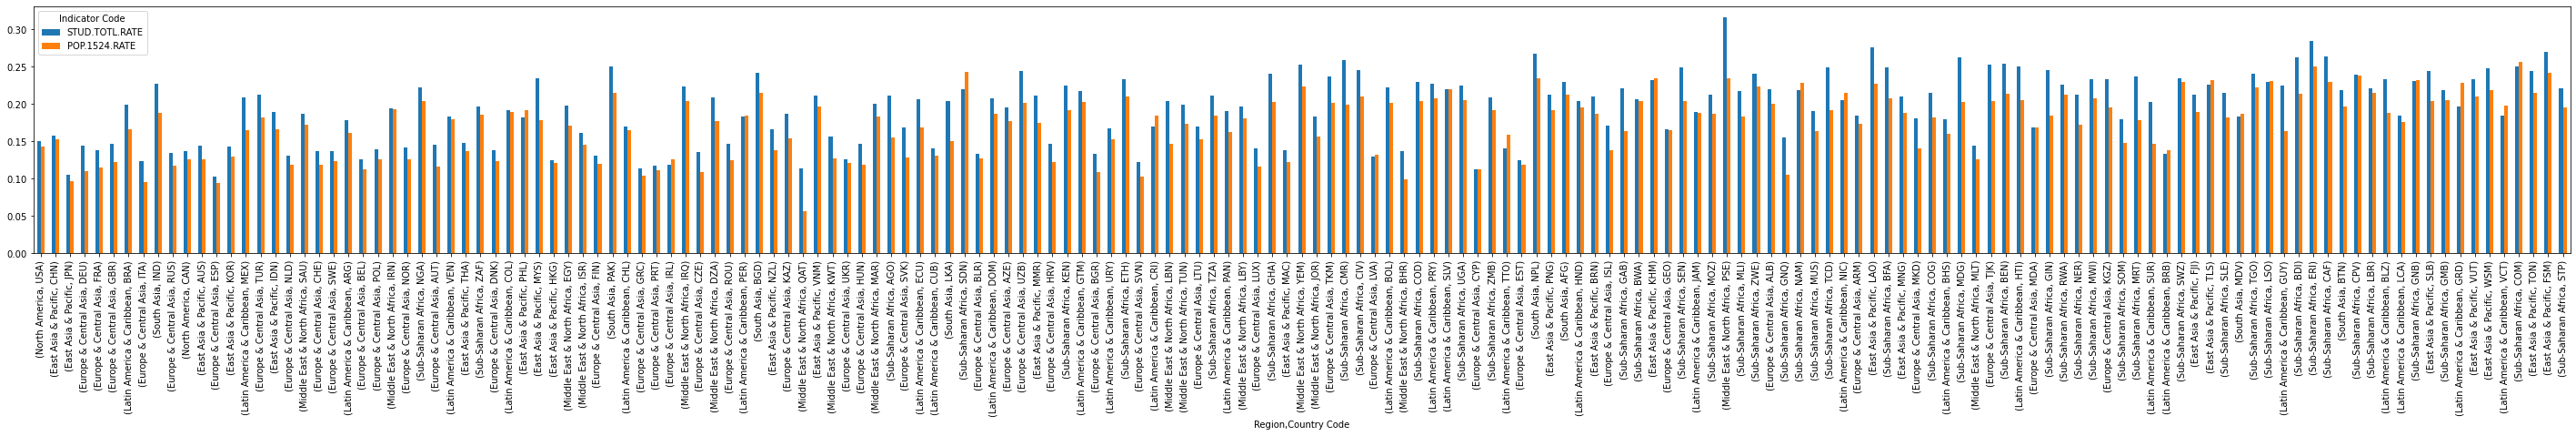

In [365]:
# plot etudiant secondaire et tertiaire par pays
# avec la population 15-24 en //
# trier par PIB !
df_final.dropna().sort_values('NY.GNP.MKTP.CD', ascending=False)[['STUD.TOTL.RATE', 'POP.1524.RATE']].plot.bar(figsize=(50,5))

<AxesSubplot:xlabel='STUD.TOTL.RATE', ylabel='POP.1524.RATE'>

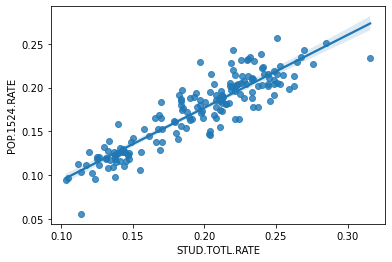

In [366]:
# correlation entre le nombre d'étudiant et la population 15-24ans
sns.regplot(x='STUD.TOTL.RATE', y='POP.1524.RATE', data=df_final.dropna())

In [367]:
# stat sur la diff entre pop 15-24 et le % d'étudiant en secondaire et tertiaire
(df_final.dropna()['POP.1524.RATE'] - df_final.dropna()['STUD.TOTL.RATE']).describe()

count    173.000000
mean      -0.022013
std        0.018803
min       -0.081506
25%       -0.033268
50%       -0.021453
75%       -0.010050
max        0.031868
dtype: float64

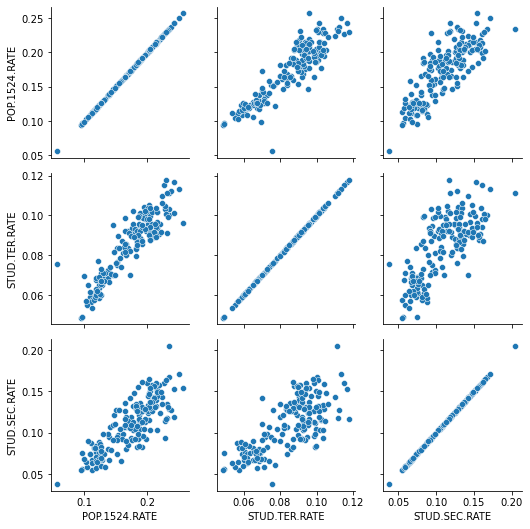

In [368]:
# Correlation concernant les étudiant par pairs
g = sns.PairGrid(df_final.dropna()[['POP.1524.RATE', 'STUD.TER.RATE', 'STUD.SEC.RATE']])
g.map(sns.scatterplot)

### Correlation PIB / accès à internet

<AxesSubplot:xlabel='Region,Country Code'>

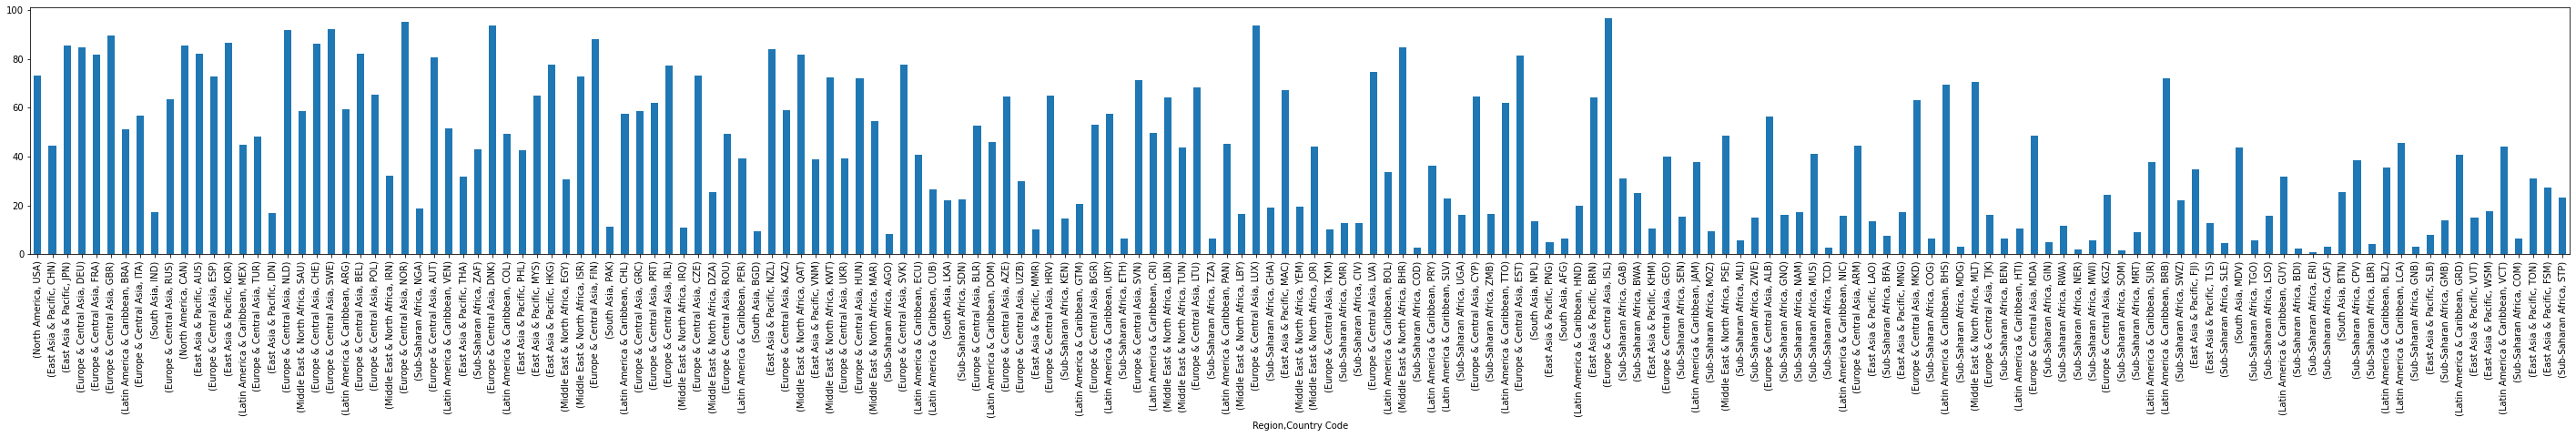

In [369]:
# Edutde de la correlation en le PIB et l'acces à internet
# trier par PIB !
df_final.dropna().sort_values('NY.GNP.MKTP.CD', ascending=False)['IT.NET.USER.P2'].plot.bar(figsize=(50,5))


In [370]:
# stat sur l'acces a internet et le PIB du pays
df_final.dropna()['IT.NET.USER.P2'].describe()

count    173.000000
mean      40.026737
std       27.855860
min        0.894407
25%       14.932507
50%       38.660986
75%       64.106152
max       96.509472
Name: IT.NET.USER.P2, dtype: float64

C:\Users\flori\AppData\Local\Temp/ipykernel_58840/1456251427.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.regplot(x='IT.NET.USER.P2', y='NY.GNP.MKTP.CD', data=df_final.dropna()[df_final['NY.GNP.MKTP.CD'] < 1e12])


<AxesSubplot:xlabel='IT.NET.USER.P2', ylabel='NY.GNP.MKTP.CD'>

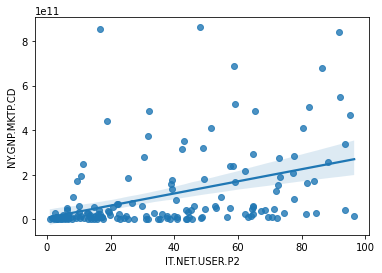

In [371]:
# correlation entre le PIB et l'accès à internet
sns.regplot(x='IT.NET.USER.P2', y='NY.GNP.MKTP.CD', data=df_final.dropna()[df_final['NY.GNP.MKTP.CD'] < 1e12])
# pas de correlation evidente

<AxesSubplot:xlabel='IT.NET.USER.P2', ylabel='LOG.GNI'>

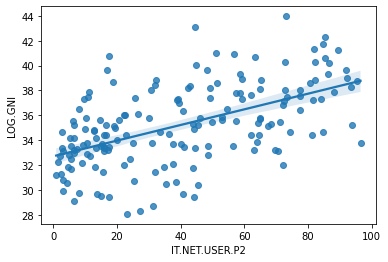

In [372]:
# Correlation avec le log du PIB pour réduire les écrats
sns.regplot(x='IT.NET.USER.P2', y='LOG.GNI', data=df_final.dropna())

       2010        2011        2012        2013        2014        2015  \
count   0.0  181.000000  181.000000  181.000000  181.000000  181.000000   
mean    NaN   -0.001963   -0.002178   -0.002303   -0.002343   -0.002323   
std     NaN    0.002732    0.003032    0.003195    0.003093    0.002843   
min     NaN   -0.009959   -0.010946   -0.011519   -0.011259   -0.010369   
25%     NaN   -0.003072   -0.003807   -0.004089   -0.004139   -0.003887   
50%     NaN   -0.001370   -0.001633   -0.001561   -0.001697   -0.001805   
75%     NaN   -0.000200   -0.000446   -0.000400   -0.000396   -0.000454   
max     NaN    0.004585    0.004974    0.006252    0.006360    0.006347   

             2016  
count  181.000000  
mean    -0.002507  
std      0.002105  
min     -0.007064  
25%     -0.004083  
50%     -0.002301  
75%     -0.000838  
max      0.003881  


<AxesSubplot:xlabel='Country Code'>

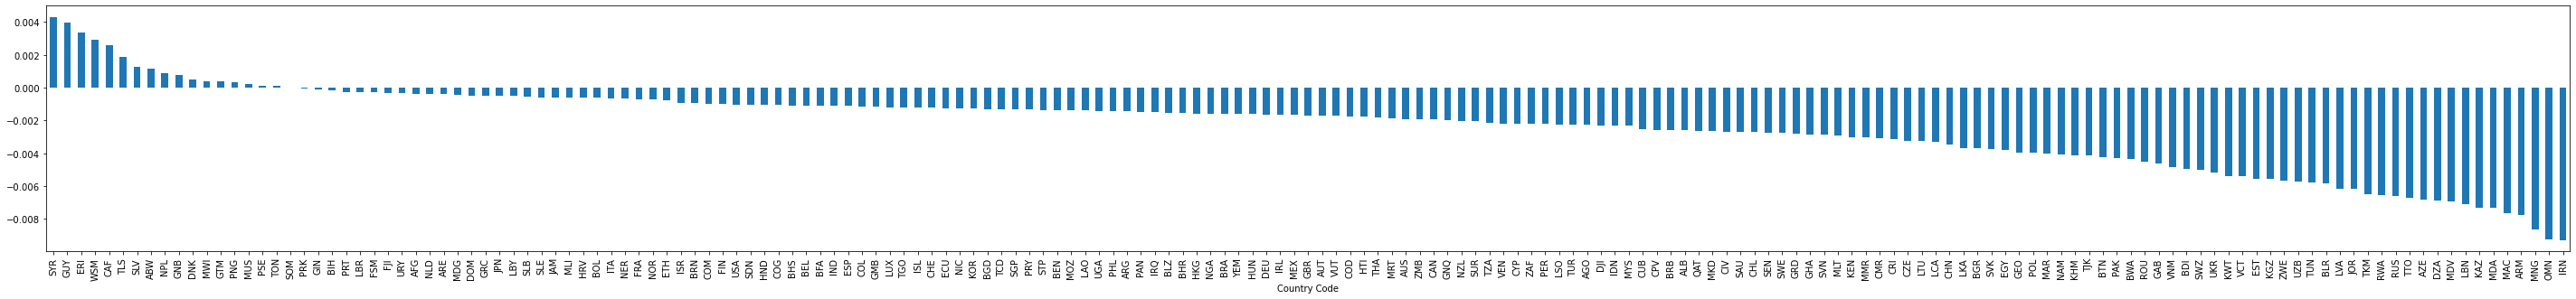

In [373]:
# Evolution moyen du % d'étudiant par pays par années
_df = df.loc[df['Indicator Code'].isin(indicator_list), ['Country Code', 'Indicator Code', *year_list]].set_index(['Indicator Code', 'Country Code']).ffill(axis=1).bfill(axis=1)
_df = (_df.loc['SP.POP.1524.TO.UN',:] / _df.loc['SP.POP.TOTL',:]).diff(axis=1)
print(_df.describe())
_df.mean(axis=1).dropna().sort_values(ascending=False).plot.bar(figsize=(50,5))


### Correlation Etudiant / PIB / Internet

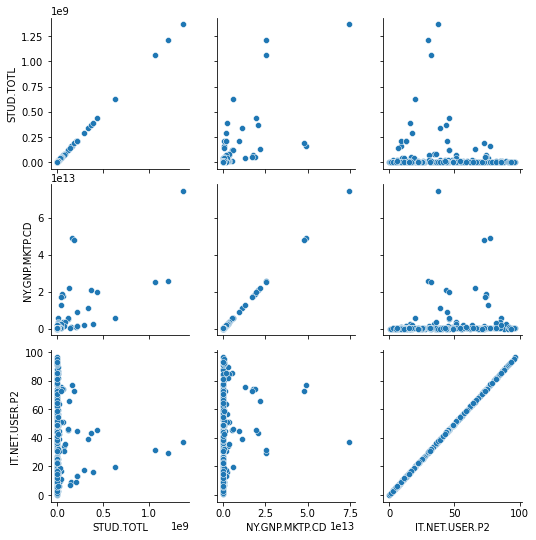

In [397]:
g = sns.PairGrid(df_final[['STUD.TOTL', 'NY.GNP.MKTP.CD', 'IT.NET.USER.P2']])
g.map(sns.scatterplot)

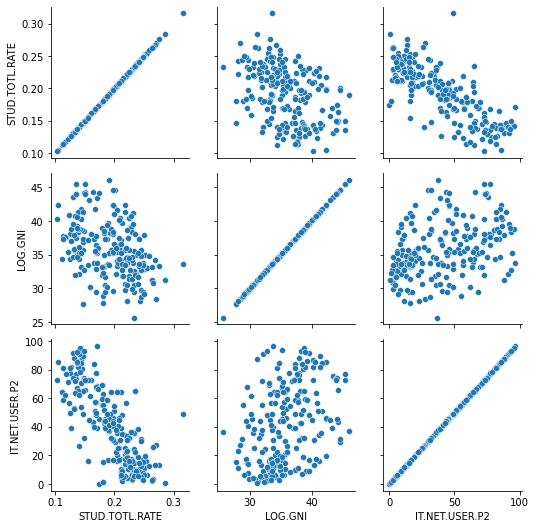

In [398]:
g = sns.PairGrid(df_final[['STUD.TOTL.RATE', 'LOG.GNI', 'IT.NET.USER.P2']])
g.map(sns.scatterplot)

### Analyse de la distribution des indicateurs

#### PIB (GNI)

<AxesSubplot:>

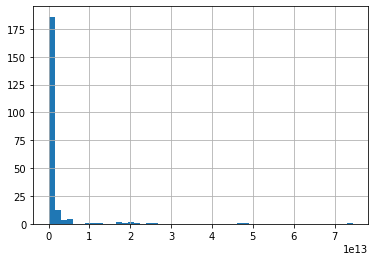

In [353]:
df_final['NY.GNP.MKTP.CD'].hist(bins=50)

<AxesSubplot:>

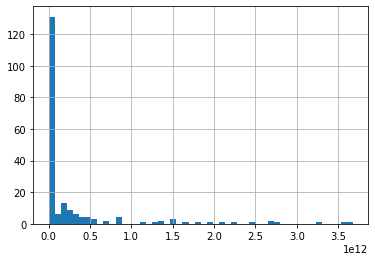

In [355]:
df_final[df_final['NY.GNP.MKTP.CD'] < 0.5e13]['NY.GNP.MKTP.CD'].hist(bins=50)

<AxesSubplot:>

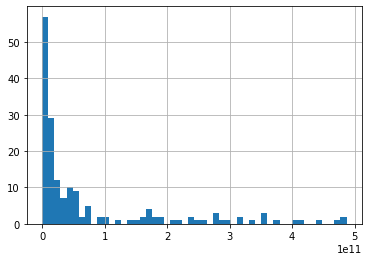

In [356]:
df_final[df_final['NY.GNP.MKTP.CD'] < 0.5e12]['NY.GNP.MKTP.CD'].hist(bins=50)

<AxesSubplot:>

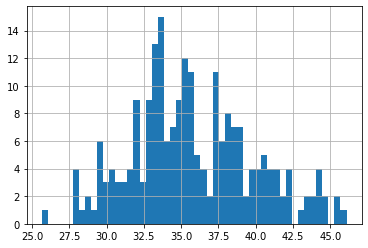

In [358]:
df_final['LOG.GNI'].hist(bins=50)

In [377]:
df_final['NY.GNP.MKTP.CD'].mean(level=0)

C:\Users\flori\AppData\Local\Temp/ipykernel_58840/3357969063.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  df_final['NY.GNP.MKTP.CD'].mean(level=0)


Region
East Asia & Pacific           6.745094e+11
Europe & Central Asia         4.212663e+11
Latin America & Caribbean     1.674679e+11
Middle East & North Africa    1.684814e+11
North America                 6.277563e+12
South Asia                    3.058367e+11
Sub-Saharan Africa            3.167254e+10
Name: NY.GNP.MKTP.CD, dtype: float64

In [379]:
df_final['NY.GNP.MKTP.CD'].groupby(level=0).apply(lambda x: x.describe())

Region                           
East Asia & Pacific         count    3.000000e+01
                            mean     6.745094e+11
                            std      1.910473e+12
                            min      5.384779e+07
                            25%      8.139012e+08
                            50%      1.761046e+10
                            75%      2.910598e+11
                            max      9.188513e+12
Europe & Central Asia       count    5.200000e+01
                            mean     4.212663e+11
                            std      7.884009e+11
                            min      2.483716e+09
                            25%      1.707491e+10
                            50%      5.972463e+10
                            75%      4.262580e+11
                            max      3.677610e+12
Latin America & Caribbean   count    3.400000e+01
                            mean     1.674679e+11
                            std      4.244936e+11
                

#### Accès à internet

<AxesSubplot:>

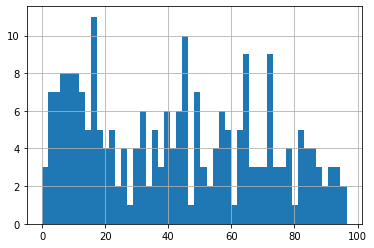

In [380]:
df_final['IT.NET.USER.P2'].hist(bins=50)

In [382]:
df_final['IT.NET.USER.P2'].describe()

count    229.000000
mean      42.456750
std       27.605806
min        0.000000
25%       15.960653
50%       42.447732
75%       65.332414
max       96.509472
Name: IT.NET.USER.P2, dtype: float64

In [383]:
df_final['IT.NET.USER.P2'].groupby(level=0).apply(lambda x: x.describe())

Region                           
East Asia & Pacific         count    33.000000
                            mean     39.824234
                            std      27.981142
                            min       0.000000
                            25%      14.892772
                            50%      34.764191
                            75%      64.810759
                            max      86.603018
Europe & Central Asia       count    54.000000
                            mean     66.655105
                            std      20.727539
                            min       9.997557
                            25%      54.519982
                            50%      65.558873
                            75%      84.132867
                            max      96.509472
Latin America & Caribbean   count    37.000000
                            mean     46.010836
                            std      16.848507
                            min      10.514329
                          

#### Nombre d'étudiant en cycle tertiaire

<AxesSubplot:>

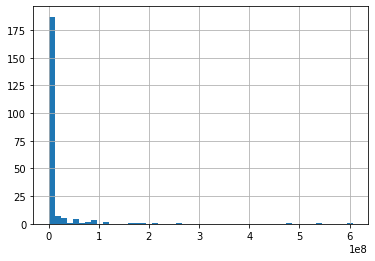

In [384]:
df_final['SP.TER.TOTL.IN'].hist(bins=50)

<AxesSubplot:>

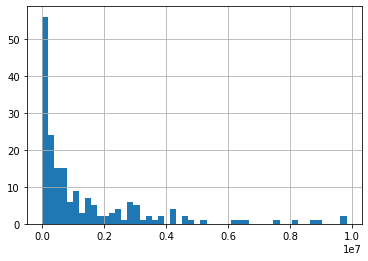

In [389]:
df_final[df_final['SP.TER.TOTL.IN'] < 1e7]['SP.TER.TOTL.IN'].hist(bins=50)

<AxesSubplot:>

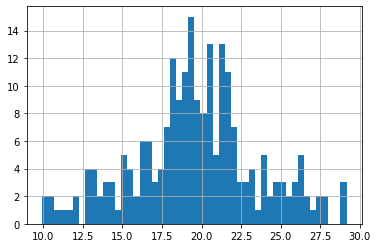

In [392]:
df_final['LOG.STUD.TER'].hist(bins=50)

In [393]:
df_final['SP.TER.TOTL.IN'].groupby(level=0).apply(lambda x: x.describe())

Region                           
East Asia & Pacific         count    3.000000e+01
                            mean     6.098214e+06
                            std      2.075285e+07
                            min      1.041429e+03
                            25%      2.621896e+04
                            50%      3.828234e+05
                            75%      3.346317e+06
                            max      1.135334e+08
Europe & Central Asia       count    4.900000e+01
                            mean     1.212126e+06
                            std      1.867565e+06
                            min      1.464286e+03
                            25%      2.642197e+05
                            50%      5.195581e+05
                            75%      1.011254e+06
                            max      9.813083e+06
Latin America & Caribbean   count    3.600000e+01
                            mean     1.486112e+06
                            std      3.237139e+06
                

## Scoring des pays

In [413]:
# Calcul du rank
df_final['RANK.STUD.TOTL'] = df_final['STUD.TOTL'].rank(pct=True)
df_final['RANK.NET.USER'] = df_final['IT.NET.USER.P2'].rank(pct=True)
df_final['RANK.GNI'] = df_final['NY.GNP.MKTP.CD'].rank(pct=True)
df_final['RANK'] = df_final['RANK.STUD.TOTL'] + df_final['RANK.NET.USER'] + df_final['RANK.GNI']
df_final.sort_values('RANK', ascending=False)

Indicator Code                           IT.NET.USER.P2  NY.GNP.MKTP.CD  \
Region                     Country Code                                   
NaN                        HIC                76.846043    4.882478e+13   
                           OED                72.944367    4.765818e+13   
                           NAC                74.260452    1.883288e+13   
                           EUU                73.982689    1.779720e+13   
                           EMU                75.580997    1.278169e+13   
East Asia & Pacific        JPN                85.306401    5.506690e+12   
North America              USA                73.035771    1.714797e+13   
NaN                        ECS                65.538253    2.192971e+13   
Europe & Central Asia      DEU                84.745271    3.677610e+12   
                           GBR                89.441457    2.688033e+12   
                           FRA                81.789500    2.723128e+12   
East Asia & Pacific        KOR                86.603018    1.295771e+12   
NaN                        UMC                45.464573    1.970108e+13   
                           EAS                43.754148    2.079907e+13   
                           WLD                37.200467    7.449731e+13   
North America              CAN                85.361429    1.677669e+12   
Europe & Central Asia      RUS                63.444155    1.771824e+12   
NaN                        LCN                46.132005    5.685535e+12   
                           ECA                51.297737    3.576095e+12   
East Asia & Pacific        CHN                44.585731    9.188513e+12   
NaN                        LAC                45.523578    5.269522e+12   
                           EAP                38.968510    1.132984e+13   
                           MIC                31.835575    2.532614e+13   
Latin America & Caribbean  BRA                51.214529    2.211229e+12   
NaN                        LMY                29.415613    2.568360e+13   
East Asia & Pacific        AUS                82.105767    1.339288e+12   
Europe & Central Asia      NLD                91.822593    8.395852e+11   
                           ESP                72.825133    1.337112e+12   
                           ITA                56.780535    2.060746e+12   
NaN                        MEA                35.920253    3.273358e+12   
Latin America & Caribbean  ARG                59.227690    5.171621e+11   
NaN                        LMC                19.641847    5.620665e+12   
Latin America & Caribbean  MEX                44.685398    1.162147e+12   
Europe & Central Asia      TUR                48.199775    8.615673e+11   
NaN                        ARB                33.991949    2.675688e+12   
Europe & Central Asia      SWE                92.195800    5.481975e+11   
                           POL                65.332414    4.869242e+11   
East Asia & Pacific        MYS                64.810759    2.937715e+11   
Middle East & North Africa SAU                58.725828    6.889098e+11   
Europe & Central Asia      BEL                82.295655    5.031889e+11   
NaN                        MNA                30.777839    1.515956e+12   
Europe & Central Asia      CHE                86.416807    6.805205e+11   
South Asia                 IND                17.399603    1.913961e+12   
NaN                        SAS                15.797747    2.446694e+12   
Europe & Central Asia      NOR                95.284552    4.702531e+11   
Latin America & Caribbean  COL                49.163197    3.207442e+11   
Europe & Central Asia      DNK                93.529716    3.369719e+11   
                           AUT                80.545441    4.115930e+11   
East Asia & Pacific        PHL                42.447732    3.152535e+11   
Latin America & Caribbean  VEN                51.487047    4.083009e+11   
Sub-Saharan Africa         ZAF                42.912731    3.507200e+11   
NaN                      

<AxesSubplot:xlabel='STUD.TOTL', ylabel='SP.POP.1524.TO.UN'>

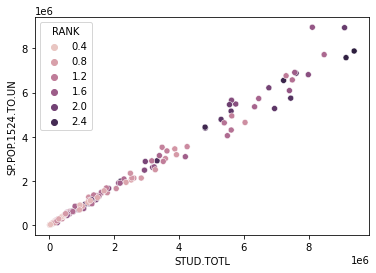

In [486]:
sns.scatterplot(x="STUD.TOTL", y="SP.POP.1524.TO.UN", data=df_final[df_final['STUD.TOTL'] < 1e7], hue='RANK')

<AxesSubplot:xlabel='LOG.GNI', ylabel='IT.NET.USER.P2'>

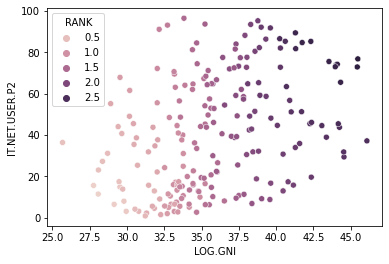

In [487]:
sns.scatterplot(x="LOG.GNI", y="IT.NET.USER.P2", data=df_final, hue='RANK')


<AxesSubplot:xlabel='LOG.STUD.TOTL', ylabel='IT.NET.USER.P2'>

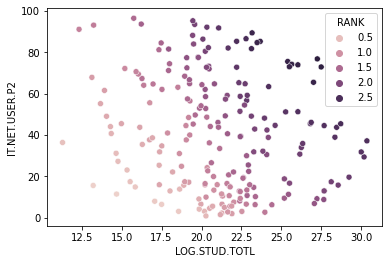

In [488]:
sns.scatterplot(x="LOG.STUD.TOTL", y="IT.NET.USER.P2", data=df_final, hue='RANK')

## Montrer les scores sur une `MAP`

In [453]:
import geopandas

In [433]:
df_final['RANK'].describe()

count    210.000000
mean       1.509435
std        0.640961
min        0.274756
25%        0.990813
50%        1.492166
75%        2.008212
max        2.796426
Name: RANK, dtype: float64

In [476]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# Fix iso a3 code
world.loc[world['name'] == 'France', 'iso_a3'] = 'FRA'
world.loc[world['name'] == 'Norway', 'iso_a3'] = 'NOR'
world.loc[world['name'] == 'Somaliland', 'iso_a3'] = 'SOM'
world.loc[world['name'] == 'Kosovo', 'iso_a3'] = 'RKS'

world.set_index('iso_a3', inplace=True, drop=True)
world = world.merge(df_final['RANK'].reset_index(level=0), how='left', right_index=True, left_index=True)
world['RANK'].fillna(0, inplace=True)

In [455]:
world.sort_values('RANK', ascending=False)[['name', 'RANK']][0:10]

name      RANK
JPN                     Japan  2.666163
USA  United States of America  2.665672
DEU                   Germany  2.648118
GBR            United Kingdom  2.637515
FRA                    France  2.576400
KOR               South Korea  2.506141
CAN                    Canada  2.447532
RUS                    Russia  2.433579
CHN                     China  2.423390
BRA                    Brazil  2.360835

<AxesSubplot:>

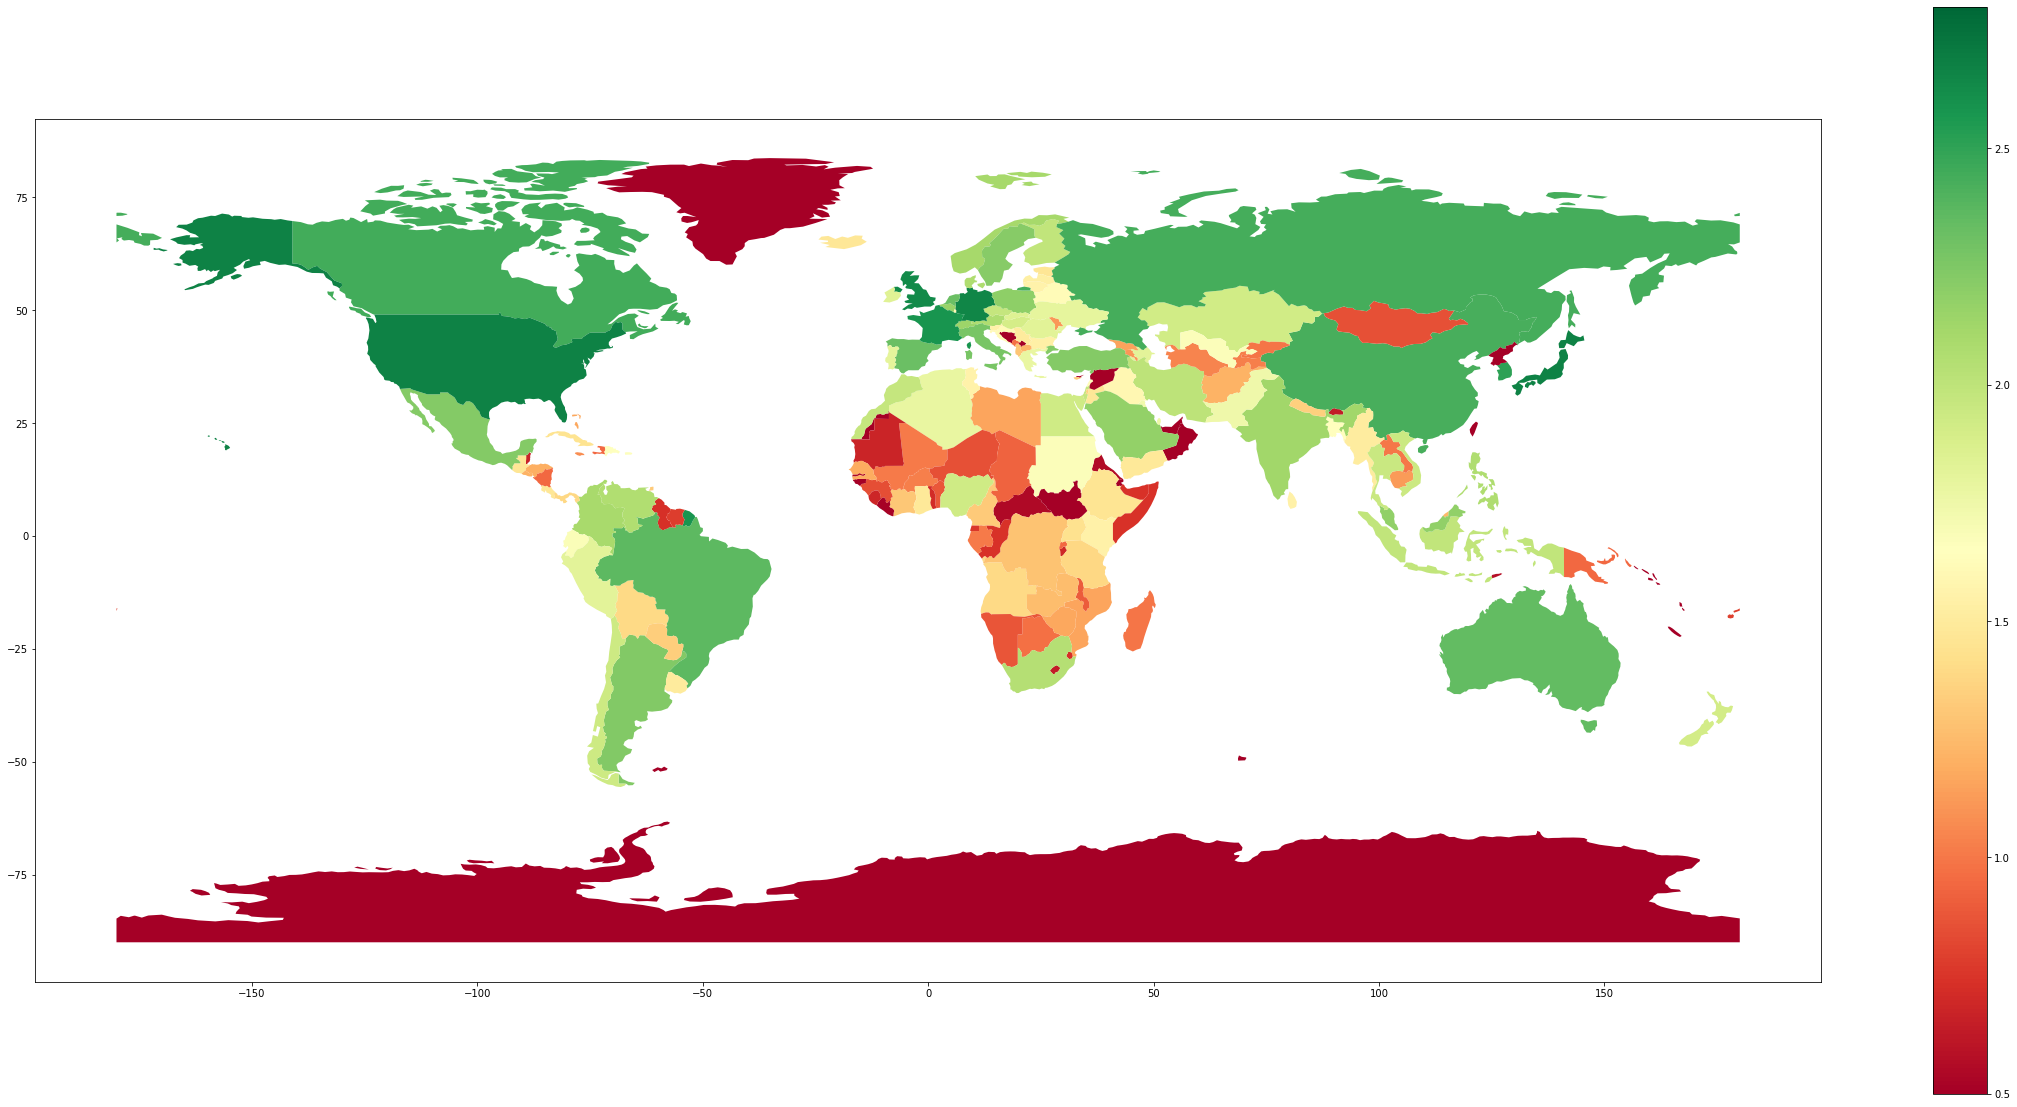

In [477]:
world.plot(column='RANK', figsize=(40,20), cmap='RdYlGn', vmin=0.5, vmax=2.8)

In [491]:
!jupyter nbconvert --to html P2_01_notebook.ipynb

[NbConvertApp] Converting notebook P2_01_notebook.ipynb to html
[NbConvertApp] Writing 5500153 bytes to P2_01_notebook.html
